In [11]:
import dataimporter_lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
with open("data/measurment-2/CLASSES.txt", "r") as classes_file:
    classes_get = classes_file.read().splitlines()
    classes_file.close()

data_np, data_labels, data_size = dataimporter.import_data(np_datapath="data/measurment-2/np_data_spectro",
                                                           np_labelpath="data/measurment-2/np_label_spectro",
                                                           datapath="data/measurment-2/clips/wav/",
                                                           labelpath="data/measurment-2/clips/txt/",
                                                           classes=classes_get)


{'IDLE_MOTOR': 0, 'OBJECT_SPLASH': 1, 'UFO': 2, 'BOAT': 3, 'VOICE': 4, 'SEAGUL_SPLASH': 5, 'SCOOTER': 6, 'SEAGUL_SCREAM': 7, 'SEAGUL_SCREAM ': 8, 'PEE': 9, 'AMBULANCE': 10, 'SEGUL_SCREAM': 11, 'BRIDGE': 12, 'BACKGROUND': 13}
Numpy file does not exist. Creating it now...


100%|██████████| 3862/3862 [00:15<00:00, 244.83it/s]


Got labels_np: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [3]:
data_flatten = np.reshape(data_np, (3862, -1))

LDA = LinearDiscriminantAnalysis(n_components=2)
fitted_LDA = LDA.fit_transform(data_flatten, data_labels)


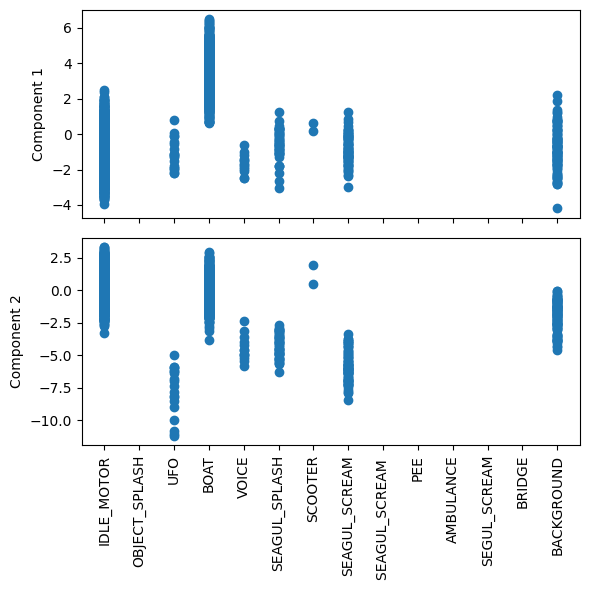

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

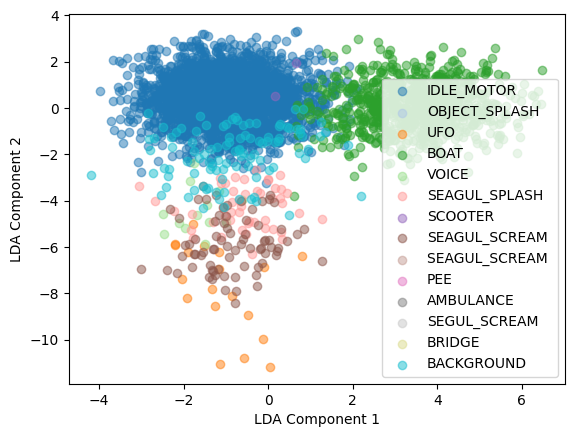

In [24]:
num_components = fitted_LDA.shape[1]
fig, axs = plt.subplots(num_components, 1, figsize=(6, 3*num_components), sharex=True)

for i in range(num_components):
    axs[i].scatter(data_labels, fitted_LDA[:, i])
    axs[i].set_ylabel(f"Component {i+1}")
    axs[i].set_xticks(range(len(classes_get)))
    axs[i].set_xticklabels(classes_get, rotation=90)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
colors = plt.cm.tab20(np.linspace(0, 1, 15))


for class_n in range(len(classes_get)):
    indices = data_labels == class_n
    ax.scatter(fitted_LDA[indices, 0], fitted_LDA[indices, 1], label=classes_get[class_n], alpha=0.5, c=colors[class_n])

ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')

ax.legend()
plt.show()
